<a href="https://colab.research.google.com/github/Pallavih28/Black_Friday_Sales_Prediction/blob/main/Black_Friday_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Black Friday Sales Prediction Model

![Your Image](https://images.thequint.com/thequint%2F2019-11%2F1072cc45-519d-4cff-8987-32a08eb60dca%2FiStock_1183383156.jpg
)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
train_df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [ ]:
train_df.shape,test_df.shape

((550068, 12), (233599, 11))

* There are 5891 customers in the dataset.
* There are 3631 products in the dataset.
* Occupation has 20 unique values.
* There are 3 city categories.
* Product_Category_1 has 20 unique categories.



In [ ]:
train_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
test_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [ ]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Variable Typecasting

In [ ]:
train_df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [ ]:
train_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
train_df[['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years']] = train_df[['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years']].astype('category')

In [ ]:
test_df[['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years']] = test_df[['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years']].astype('category')

In [ ]:
train_df.dtypes

User_ID                          int64
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                   int64
Product_Category_1               int64
Product_Category_2             float64
Product_Category_3             float64
Purchase                         int64
dtype: object

In [ ]:
test_df.dtypes

User_ID                          int64
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                   int64
Product_Category_1               int64
Product_Category_2             float64
Product_Category_3             float64
dtype: object

### Exploratory Data Analysis

* Univariate Data Analysis

In [ ]:
train_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

#### Gender

In [ ]:
train_df['Gender'].value_counts(normalize=True)*100

Gender
M    75.310507
F    24.689493
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='Gender'>

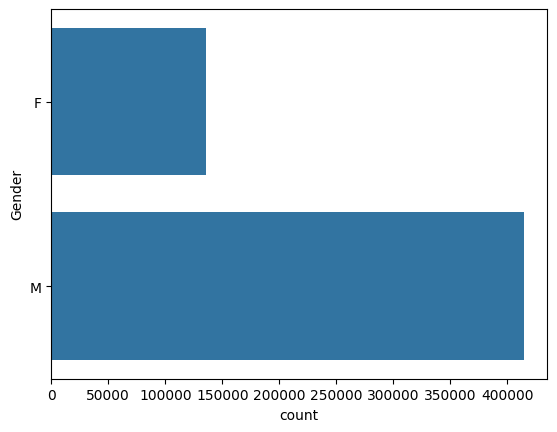

In [ ]:
sns.countplot(train_df['Gender'])

#### Age

In [ ]:
train_df['Age'].value_counts(normalize=True)*100

Age
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='Age'>

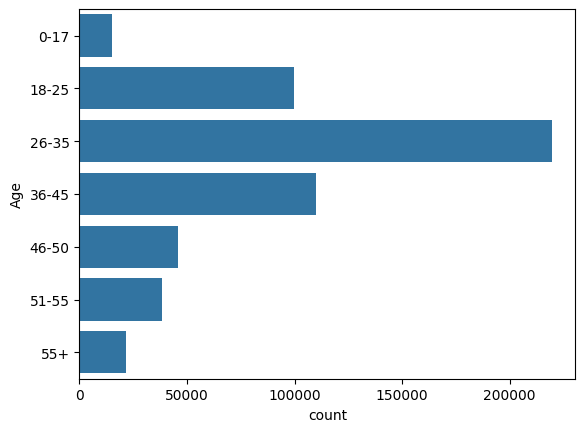

In [ ]:
sns.countplot(train_df['Age'])

#### Occupation

In [ ]:
train_df['Occupation'].value_counts(normalize=True)*100

Occupation
4     13.145284
0     12.659889
7     10.750125
1      8.621843
17     7.279645
20     6.101427
12     5.668208
14     4.964659
2      4.833584
16     4.612339
6      3.700452
3      3.208694
10     2.350618
5      2.213726
15     2.211545
11     2.106285
19     1.538173
13     1.404917
18     1.203851
9      1.143677
8      0.281056
Name: proportion, dtype: float64

<Axes: xlabel='Occupation'>

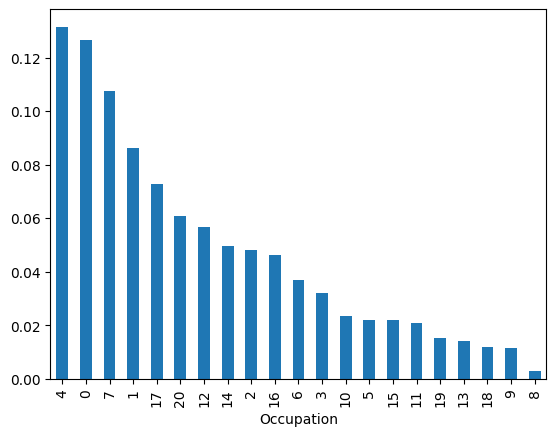

In [ ]:
train_df['Occupation'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
col = ['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']

In [ ]:
def count_plots(data, columns):
    no_columns = len(columns)
    no_rows = (no_columns + 2) // 3
    fig, axes = plt.subplots(no_rows, 3, figsize=(15, 12))
    axes = axes.flatten()
    for j, column in enumerate(columns):
        sns.countplot(x=column, data=data, ax=axes[j])
    plt.tight_layout()
    plt.show()

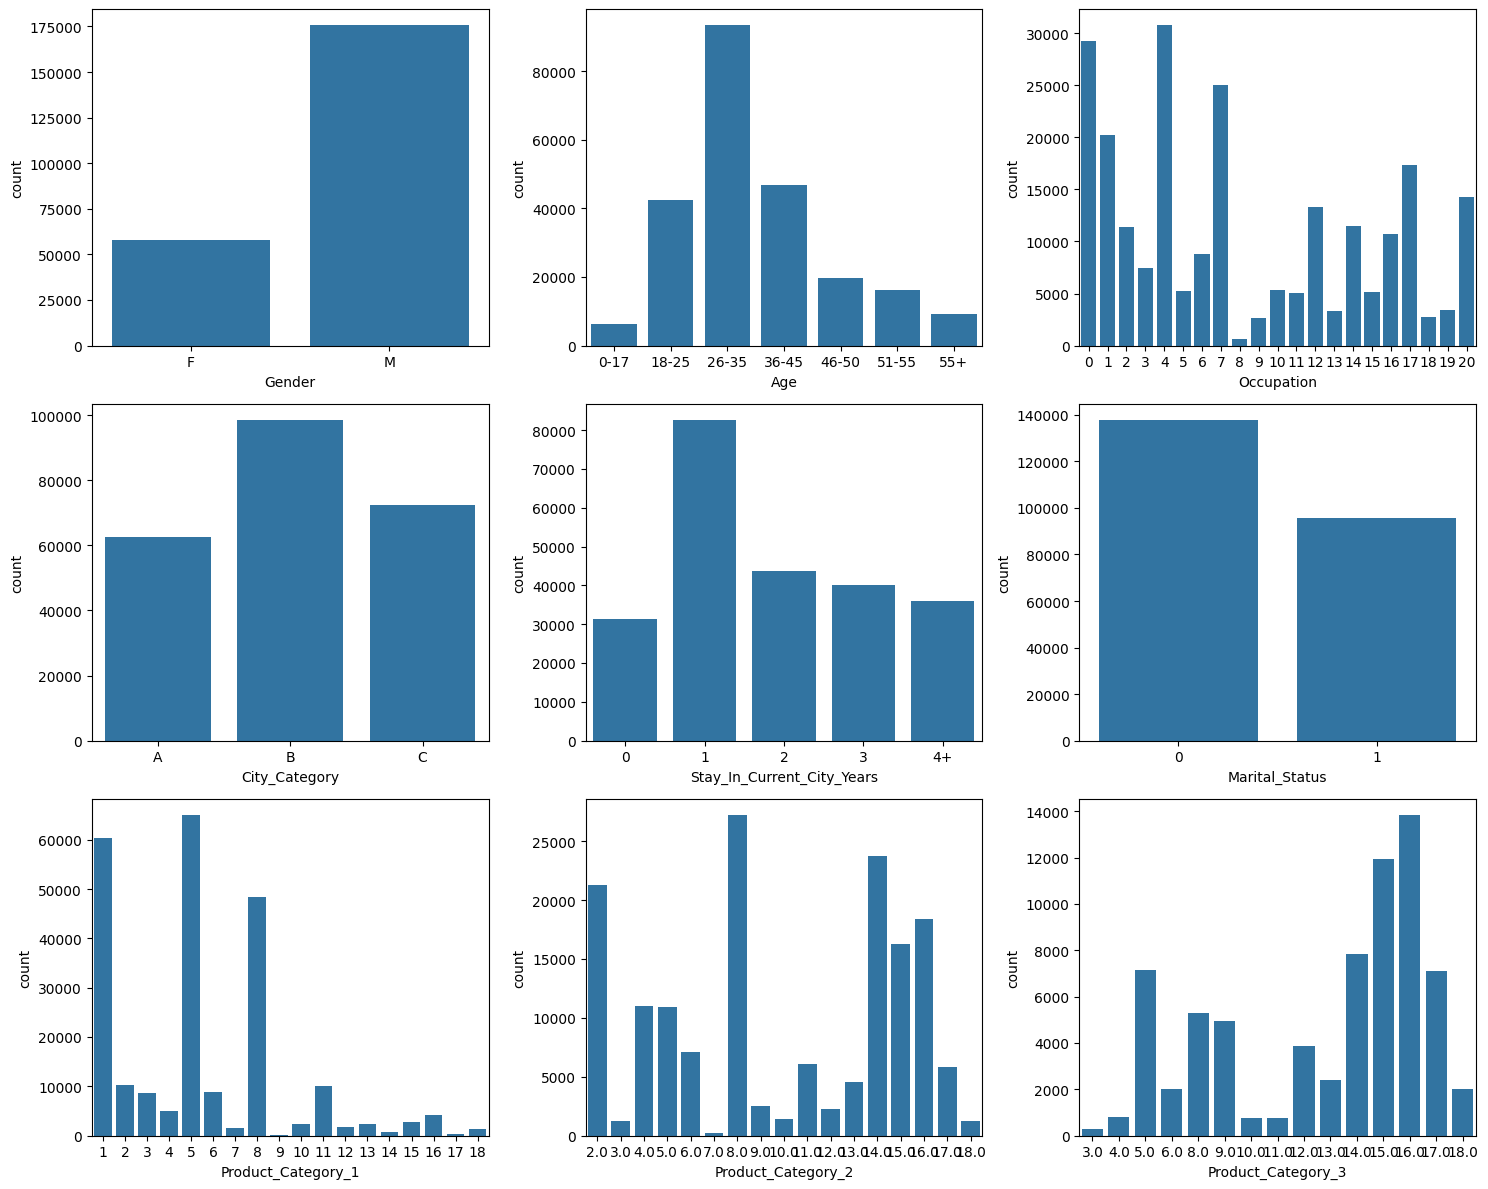

In [ ]:
count_plots(test_df, col)

In [ ]:
train_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


<Axes: xlabel='Purchase', ylabel='Density'>

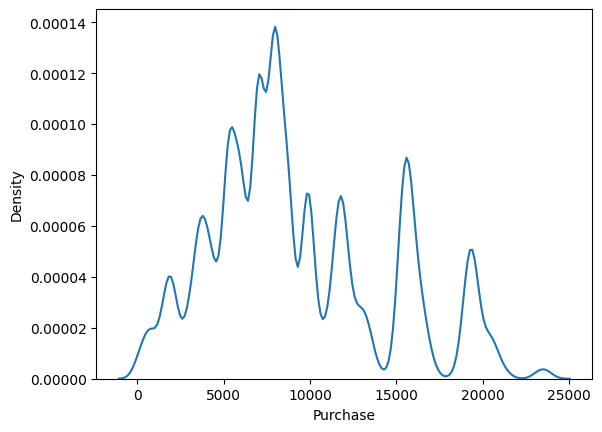

In [ ]:
sns.kdeplot(train_df['Purchase'])

### Data Preprocessing



In [ ]:
train_df = train_df.drop(['Product_ID'],axis=1)

In [ ]:
test_df = test_df.drop(['Product_ID'],axis=1)

In [ ]:
train_df.dtypes

User_ID                          int64
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                   int64
Product_Category_1               int64
Product_Category_2             float64
Product_Category_3             float64
Purchase                         int64
dtype: object

In [ ]:
df_train = pd.get_dummies(train_df,dtype='int64',drop_first=True)

In [ ]:
df_train.nunique()

User_ID                           5891
Occupation                          21
Marital_Status                       2
Product_Category_1                  20
Product_Category_2                  17
Product_Category_3                  15
Purchase                         18105
Gender_M                             2
Age_18-25                            2
Age_26-35                            2
Age_36-45                            2
Age_46-50                            2
Age_51-55                            2
Age_55+                              2
City_Category_B                      2
City_Category_C                      2
Stay_In_Current_City_Years_1         2
Stay_In_Current_City_Years_2         2
Stay_In_Current_City_Years_3         2
Stay_In_Current_City_Years_4+        2
dtype: int64

In [ ]:
df_test = pd.get_dummies(test_df,dtype='int64',drop_first=True)

In [ ]:
df_test.nunique()

User_ID                          5891
Occupation                         21
Marital_Status                      2
Product_Category_1                 18
Product_Category_2                 17
Product_Category_3                 15
Gender_M                            2
Age_18-25                           2
Age_26-35                           2
Age_36-45                           2
Age_46-50                           2
Age_51-55                           2
Age_55+                             2
City_Category_B                     2
City_Category_C                     2
Stay_In_Current_City_Years_1        2
Stay_In_Current_City_Years_2        2
Stay_In_Current_City_Years_3        2
Stay_In_Current_City_Years_4+       2
dtype: int64

#### Imputing missing values

In [ ]:
df_train = df_train.fillna(value=0)

In [ ]:
df_test = df_test.fillna(value=0)

In [ ]:
X = df_train.drop('Purchase',axis=1)
y = df_train['Purchase']

#### Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import StackingRegressor, AdaBoostRegressor,ExtraTreesRegressor,GradientBoostingRegressor

In [ ]:
def model_pred(model, X, y, cv=5):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=45)

    model.fit(X_train, y_train)

    # Use Dask arrays with explicit chunks
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
    val_r2 = r2_score(y_val, val_pred)

    results_dict = {
        'Model': str(model),
        'Training RMSE': round(train_rmse,3),
        'Validation RMSE': round(val_rmse,3),
        'Validation R2 Score': round(val_r2,3)
    }

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=val_pred, y=y_val, alpha=0.6, edgecolor='w', linewidth=0.5)
    plt.title('Scatter Plot of Predictions vs True Values (Validation Set)', fontsize=16)
    plt.xlabel('Predicted Values', fontsize=14)
    plt.ylabel('True Values', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    return results_dict


### 1. Linear Regression Model

In [ ]:
lr = LinearRegression()

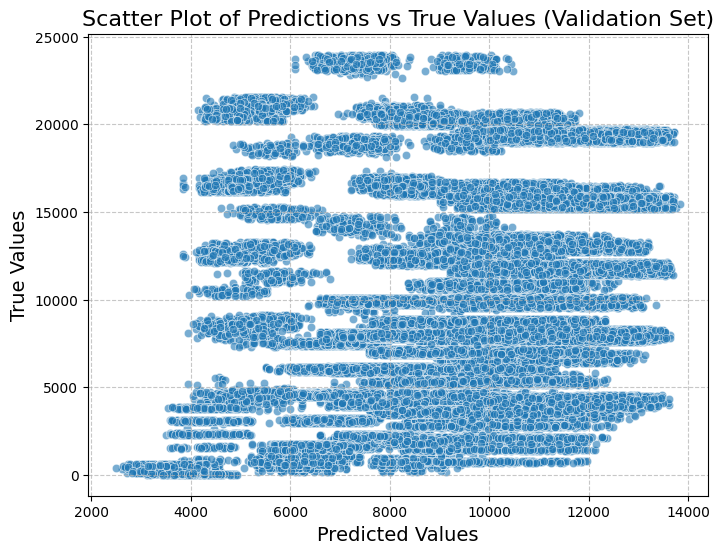

{'Model': 'LinearRegression()',
 'Training RMSE': 4623.157,
 'Validation RMSE': 4624.773,
 'Validation R2 Score': 0.155}

In [ ]:
LR = model_pred(lr, X, y, cv=5)
LR

### 2. Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor()

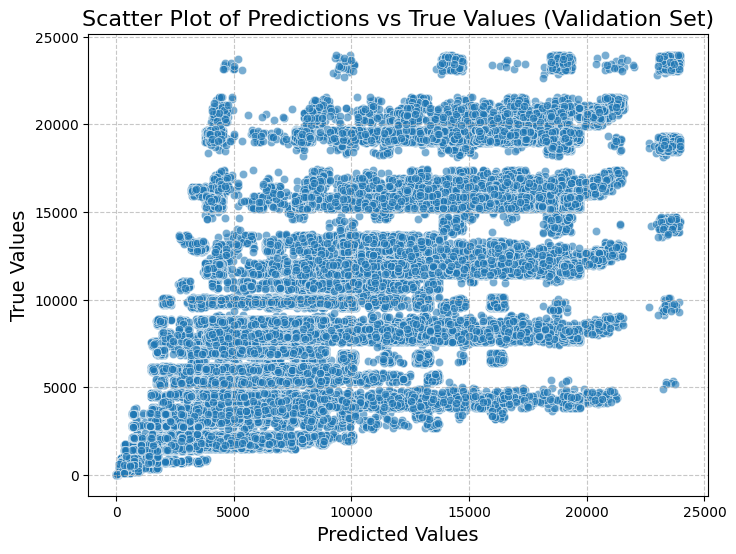

{'Model': 'DecisionTreeRegressor()',
 'Training RMSE': 1802.931,
 'Validation RMSE': 3484.668,
 'Validation R2 Score': 0.52}

In [ ]:
DT = model_pred(dt, X, y, cv=5)
DT

### 3. Random Forest Model

In [ ]:
clf = RandomForestRegressor()

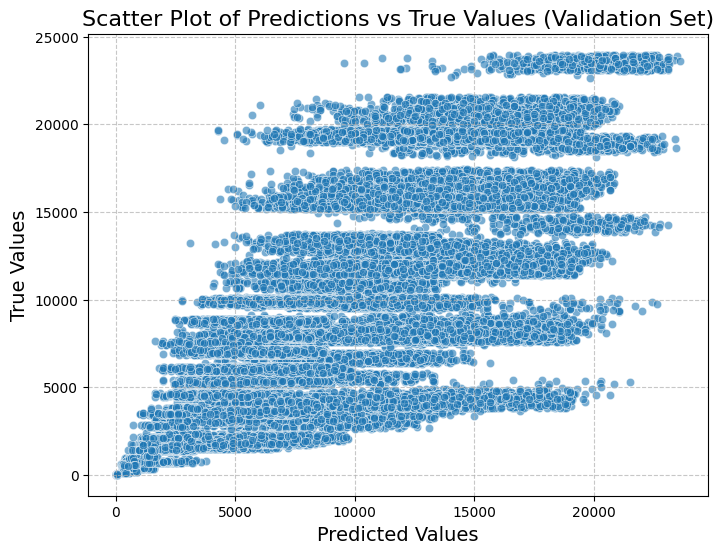

{'Model': 'RandomForestRegressor()',
 'Training RMSE': 1931.707,
 'Validation RMSE': 2983.658,
 'Validation R2 Score': 0.648}

In [ ]:
RF = model_pred(clf, X, y, cv=5)
RF

* Hyper Parameter Tuning




In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=45)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


* Neural Network


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=45)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((385047, 19), (165021, 19), (385047,), (165021,))

In [ ]:
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense

In [ ]:
model = Sequential()

In [ ]:
input_neurons = X_train.shape[1]
number_hidden_layers = 2
output_layer_neuron = 1
hidden_layer_1_neurons = 10
hidden_layer_2_neurons = 5

In [ ]:
model.add(InputLayer(input_shape=(input_neurons,)))

In [ ]:
model.add(Dense(units=hidden_layer_1_neurons,activation='relu'))
model.add(Dense(units=hidden_layer_2_neurons,activation='relu'))
model.add(Dense(units=output_layer_neuron,activation='linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                200       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 10)                60        
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 486 (1.90 KB)
Trainable params: 486 (1.90 

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model_history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=50)

Epoch 1/50
12033/12033 [==============================] - 61s 5ms/step - loss: 26242130.0000 - val_loss: 25311580.0000
Epoch 2/50
12033/12033 [==============================] - 30s 3ms/step - loss: 25317966.0000 - val_loss: 25536470.0000
Epoch 3/50
12033/12033 [==============================] - 29s 2ms/step - loss: 25263302.0000 - val_loss: 25396128.0000
Epoch 4/50
12033/12033 [==============================] - 29s 2ms/step - loss: 25235086.0000 - val_loss: 25230196.0000
Epoch 5/50
12033/12033 [==============================] - 29s 2ms/step - loss: 25206288.0000 - val_loss: 25328072.0000
Epoch 6/50
12033/12033 [==============================] - 30s 3ms/step - loss: 25145514.0000 - val_loss: 25093814.0000
Epoch 7/50
12033/12033 [==============================] - 34s 3ms/step - loss: 24716490.0000 - val_loss: 24589676.0000
Epoch 8/50
12033/12033 [==============================] - 33s 3ms/step - loss: 24612594.0000 - val_loss: 24579542.0000
Epoch 9/50
12033/12033 [========================

In [ ]:
predictions = model.predict(X_val)

5157/5157 [==============================] - 8s 1ms/step


In [ ]:
np.sqrt(mean_squared_error(predictions,y_val))

4660.634478800395